In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('../data/bus_running_time_all_features.csv')

data = data[data['week_no']<=36]

improved_features =  ['deviceid','segment','length',
            'rt(n-1)','rt(n-2)', 'rt(n-3)','rt(t-1)', 'rt(t-2)', 'rt(w-1)', 'rt(w-2)', 'rt(w-3)', 'dt(n-1)','max_elevation','avg_elevation',
'total_poi_count', 'average_poi_distance','segment_gradient_average', 'stop_to_stop_gradient','significant_bend_count']

initial_features = ['deviceid','day_of_week','time_of_day','Sunday/holiday','saturday','segment','length','precip','temp',
            'rt(n-1)','rt(n-2)', 'rt(n-3)','rt(t-1)', 'rt(t-2)', 'rt(w-1)', 'rt(w-2)', 'rt(w-3)', 'dt(n-1)']

X_train_1 = data[improved_features]
X_train_2 = data[initial_features]

scaler_1 = StandardScaler()
scaler_2 = StandardScaler()

X_train_scaled_1 = scaler_1.fit_transform(X_train_1)
X_train_scaled_2 = scaler_2.fit_transform(X_train_2)

pca1 = PCA(n_components=16)
pca2 = PCA(n_components=16)

pca1.fit(X_train_scaled_1)
pca2.fit(X_train_scaled_2)

PCA(n_components=16)

In [3]:
loadings1 = pca1.components_.T * np.sqrt(pca1.explained_variance_)
loading_matrix1 = pd.DataFrame(loadings1, index=scaler_1.get_feature_names_out())
loading_array1 = pd.DataFrame(loading_matrix1[0],index=scaler_1.get_feature_names_out())
loading_array1 = loading_array1.transpose()

In [67]:
plt.rcParams['font.size'] = 25
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.style'] = 'normal'

<Axes: >

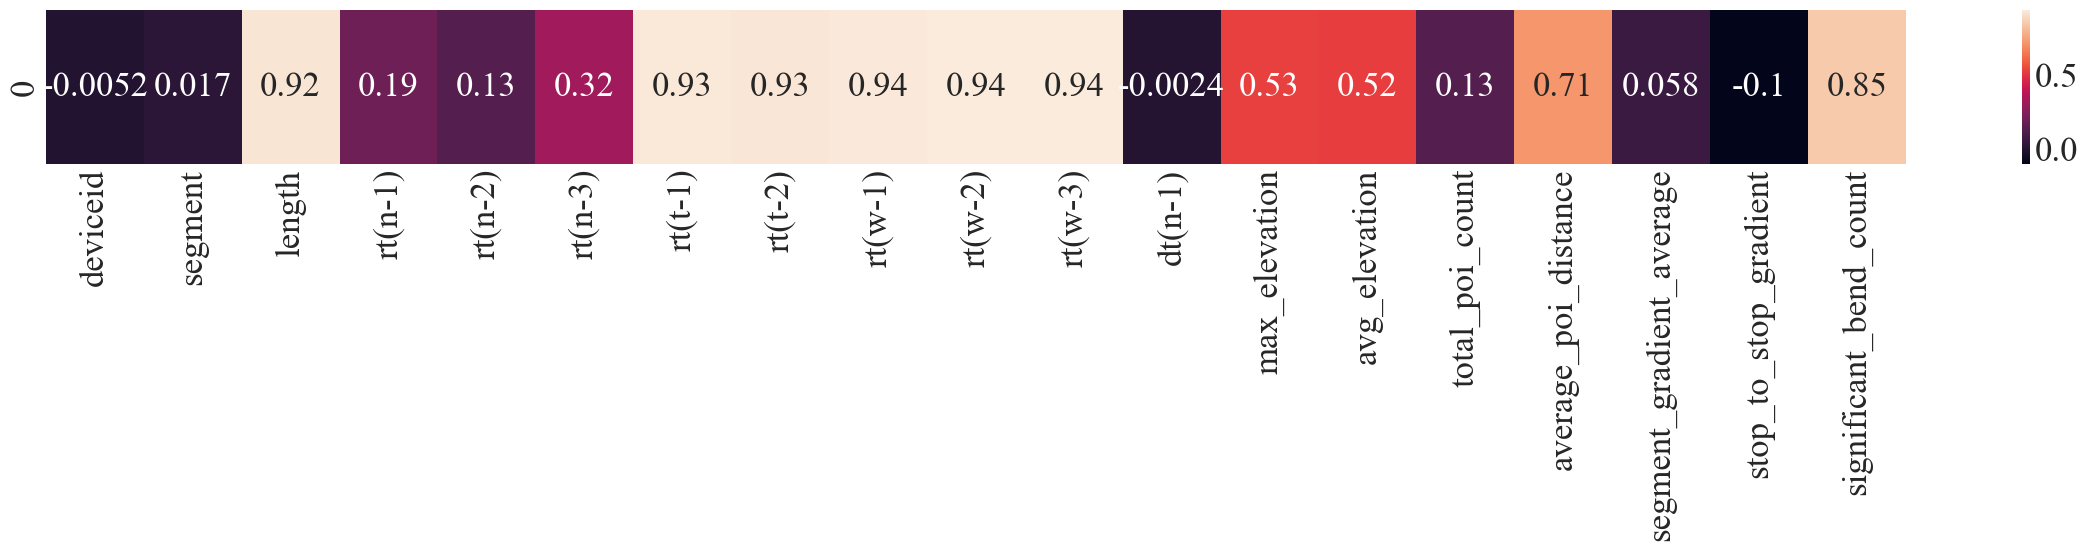

In [68]:
plt.figure(figsize=[30,2])
sns.heatmap(loading_array1,annot=True)
#plt.savefig('pca_loding.svg')

In [69]:
loadings2 = pca2.components_.T * np.sqrt(pca2.explained_variance_)
loading_matrix2 = pd.DataFrame(loadings2, index=scaler_2.get_feature_names_out())
loading_array2 = pd.DataFrame(loading_matrix2[0],index=scaler_2.get_feature_names_out())
loading_array2 = loading_array2.transpose()

<Axes: >

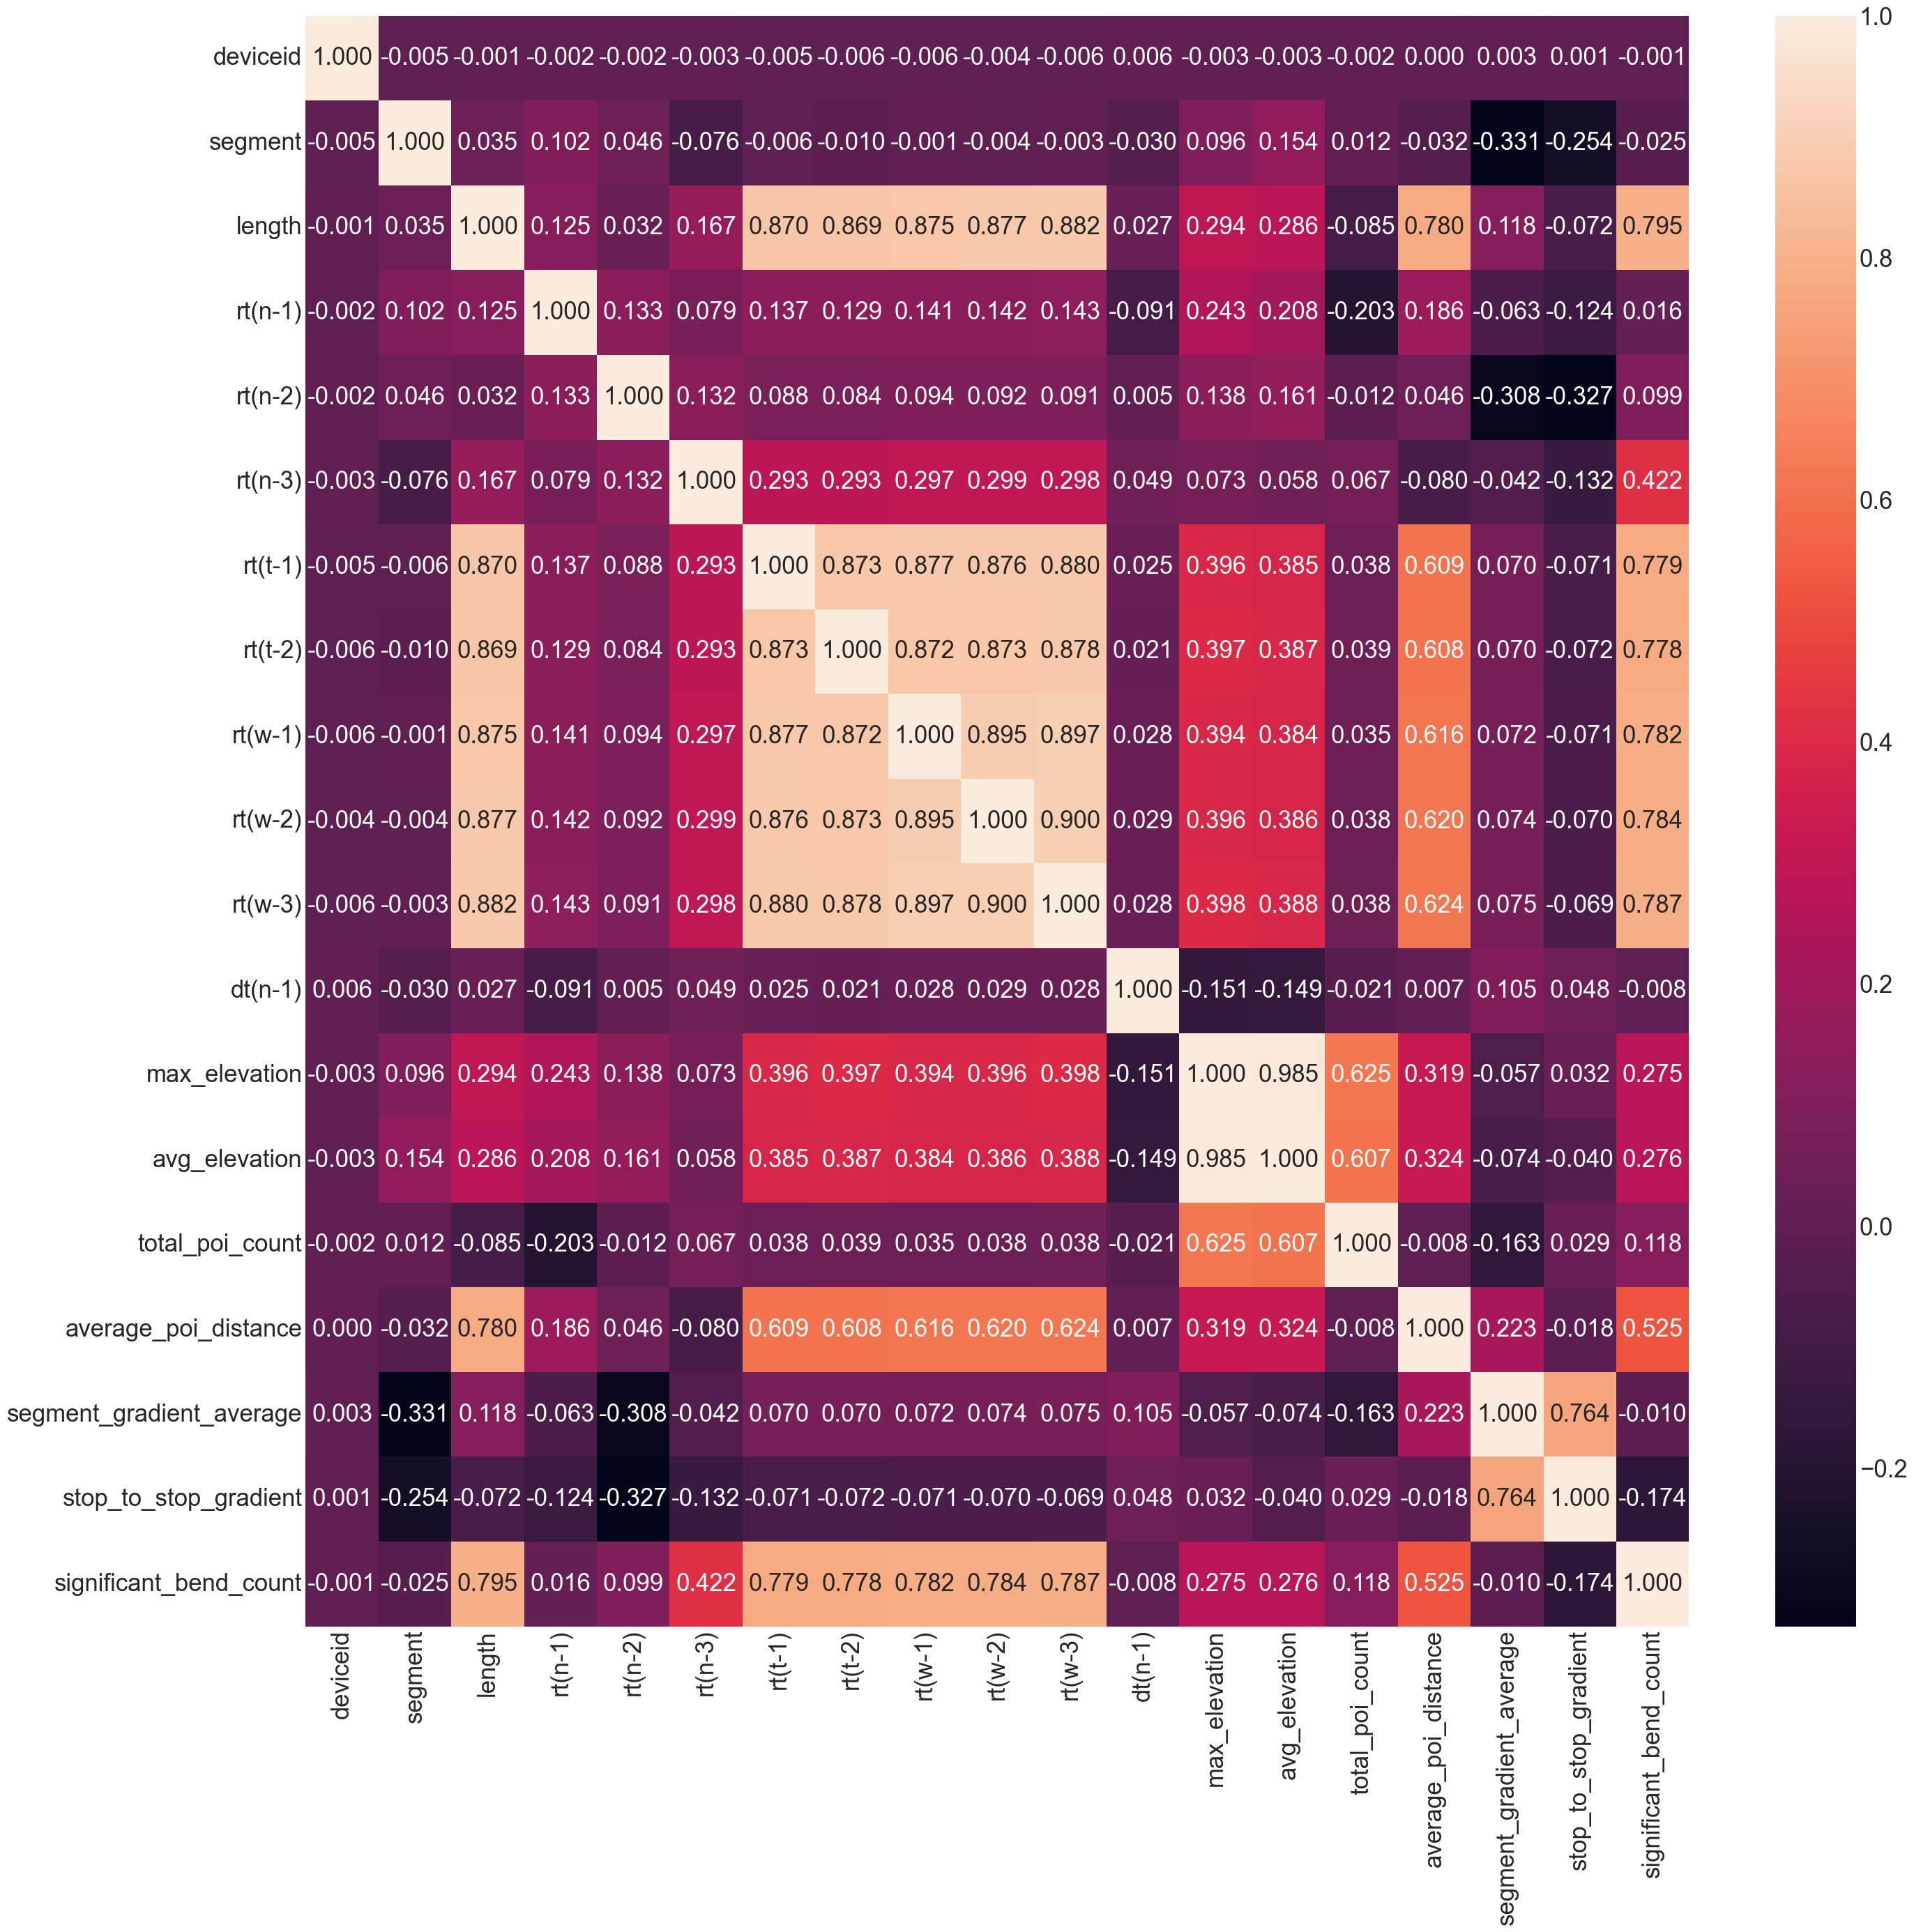

In [82]:
plt.figure(figsize=[32,30])
sns.heatmap(X_train_1.corr(method='pearson'),annot=True,fmt='.3f')

<Axes: >

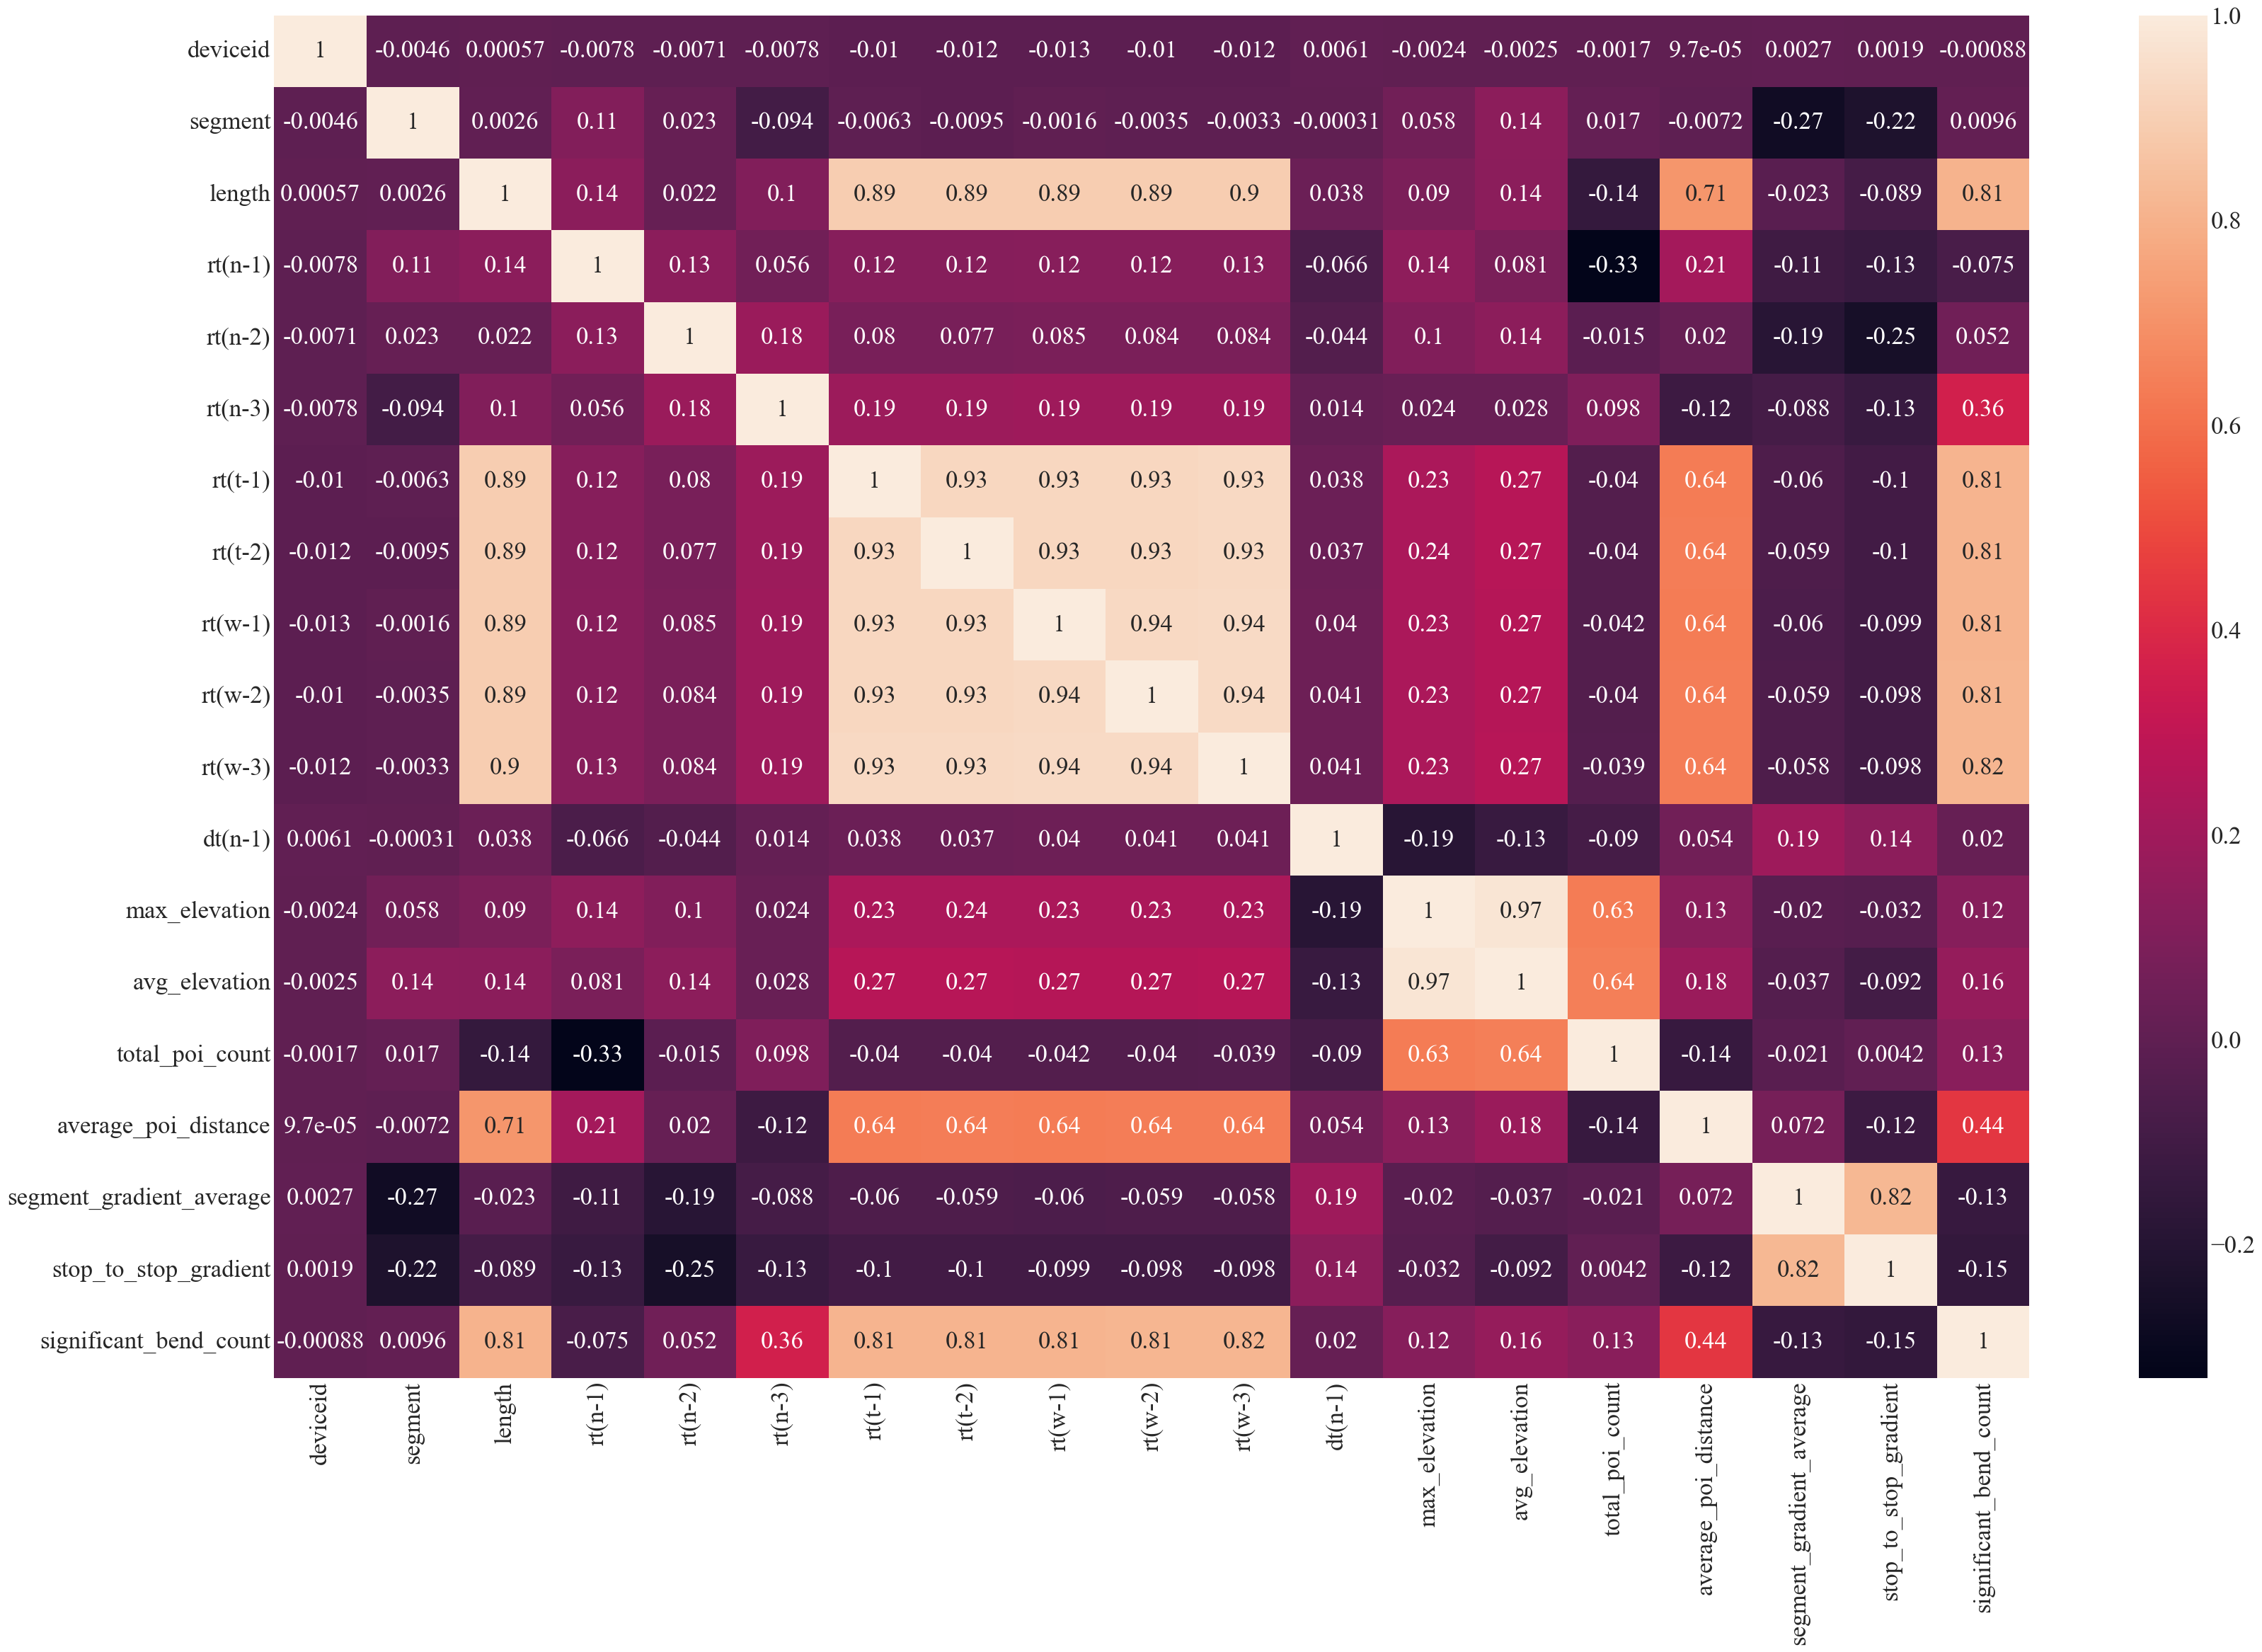

In [71]:
plt.figure(figsize=[40,25])
sns.heatmap(X_train_1.corr(method='spearman'),annot=True)

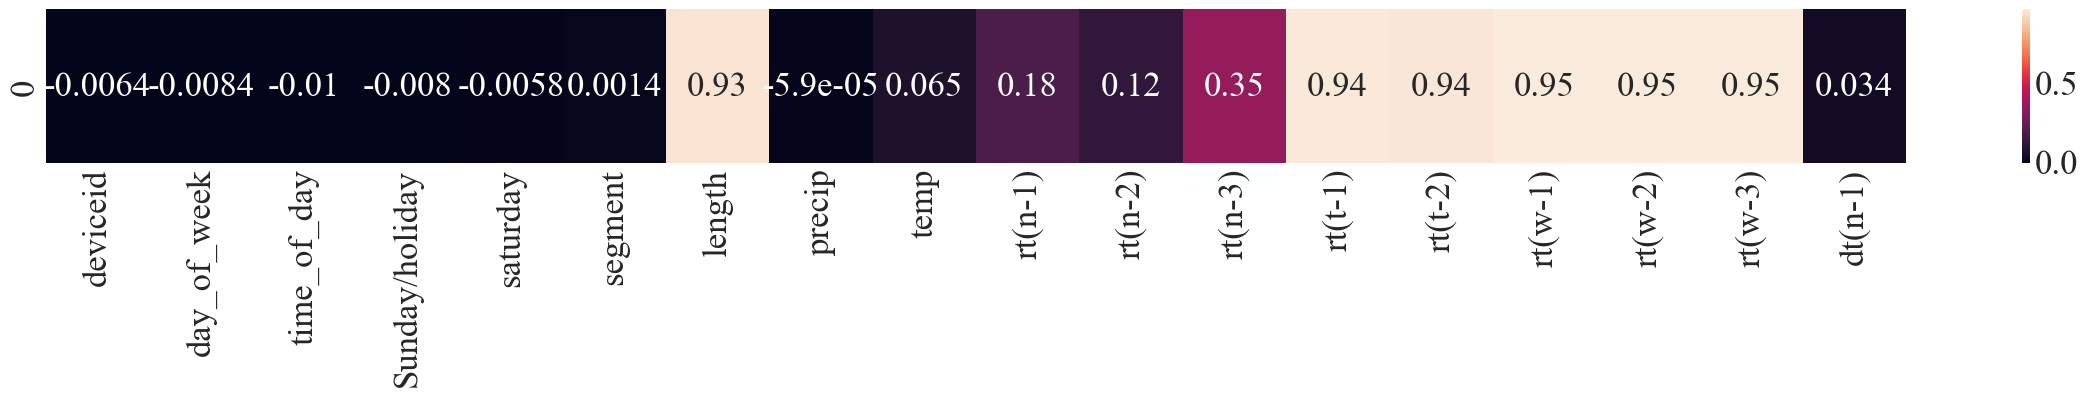

In [72]:
plt.figure(figsize=[30,2])
sns.heatmap(loading_array2,annot=True)
#plt.savefig('pca_loding2.svg')

In [73]:
shap1 = pd.read_csv('../data/shap_dwell_improved.csv')
shap2 = pd.read_csv('../data/shap_dwell_initial.csv')

In [74]:
shap1

,Unnamed: 0,feature,importance
0,1,weekday/end,0.000000
1,4,temp,0.000000
2,3,precip,0.000684
3,6,time_of_day,0.001523
4,7,dt(n-2),0.041125
5,0,day_of_week,0.047843
6,2,Sunday/holiday,0.081442
7,9,dt(n-3),0.203418
8,17,dt(w-1),0.224293
9,10,rt(n-1),0.333230


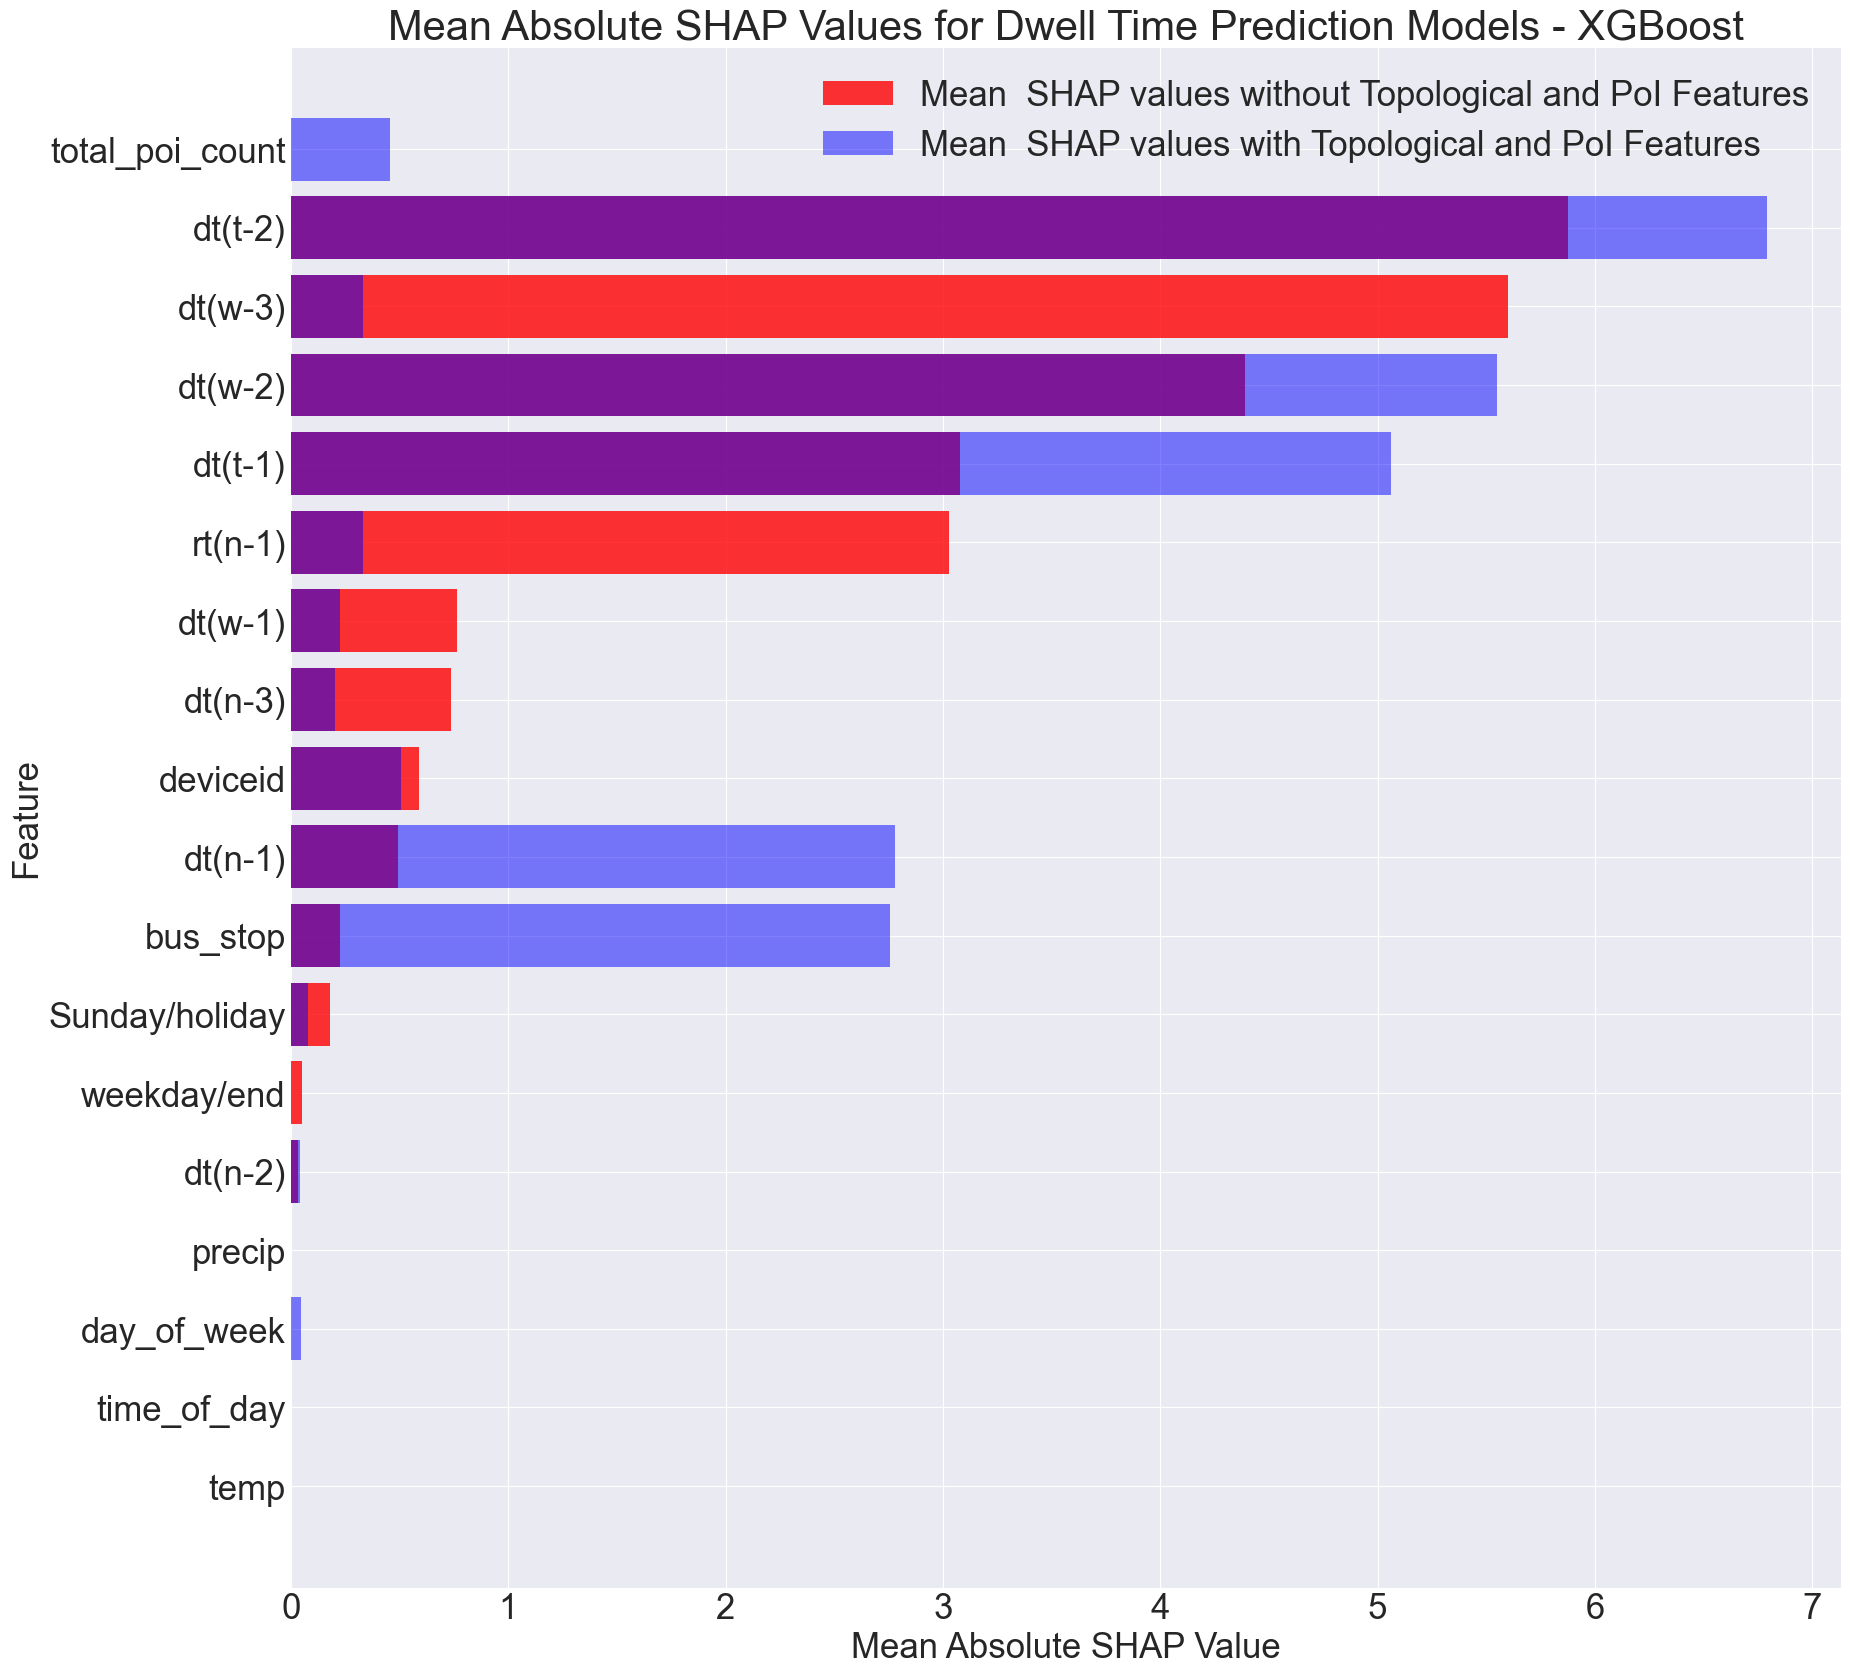

In [75]:
plt.figure(figsize=[20,20])
plt.style.use('seaborn-v0_8-darkgrid')
plt.barh(y = shap2['feature'],width=shap2['importance'], color = 'red',label = "Mean  SHAP values without Topological and PoI Features",alpha = 0.8)
plt.barh(y = shap1['feature'],width=shap1['importance'], color = 'blue',label = "Mean  SHAP values with Topological and PoI Features",alpha = 0.5)
plt.title("Mean Absolute SHAP Values for Dwell Time Prediction Models - XGBoost")
plt.xlabel("Mean Absolute SHAP Value")
plt.ylabel("Feature")
plt.legend()